## Run all the codes in the utils

In [1]:
%run parameters.ipynb

In [ ]:
import os
os.environ["PYSPARK_PYTHON"] = "/Users/snehalnair/Workspace/blog/image_processing/imageenv/bin/python"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages com.linkedin.sparktfrecord:spark-tfrecord_2.11:0.2.1 pyspark-shell"

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('vla').getOrCreate()

In [2]:
%run utils.ipynb

## Load the data

In [3]:
stageNN

[__main__.BuildNN]

In [4]:
df = spark.read.format("csv").option("header", "true").option("quote", "\"").option("escape", "\"")\
.load("sampledata.csv")

def parse_array(s):
    return ast.literal_eval(s)
parse_array_udf = fn.udf(parse_array, ArrayType(StringType()))

for col_ in ['pagePathLevel1', 'pagePathLevel2', 'pagePathLevel3', 'contentGroup4']:
    df = df.withColumn(col_, parse_array_udf(fn.col(col_)))

## Run pipeline

In [5]:
df_allfeatures = Pipeline(stages=stages[:-2]).fit(df).transform(df)

In [21]:
cols = ['timeOnSite_scaled',
 'timeBetweenVisits_scaled',
 'channelGrouping_index',
 'deviceCategory_index',
 'city_index',
 'pagePathLevel1_vector',
 'pagePathLevel2_vector',
 'pagePathLevel3_vector',
 'transactionsIn0_binary',
]

# df_allfeatures.select(cols).show()

In [6]:
df_lstm = Pipeline(stages=stages).fit(df).transform(df)

In [7]:
df_lstm.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(60,[0,5,10,15,24...|  1.0|
|(60,[0,5,10,15,22...|  1.0|
|(60,[0,5,10,15,20...|  2.0|
|(60,[0,5,10,15,25...|  2.0|
|(60,[0,5,10,15,26...|  1.0|
|(60,[0,5,10,15,27...|  1.0|
|(60,[0,5,10,15,24...|  1.0|
|(60,[0,5,10,15,24...|  1.0|
|(60,[0,5,10,15,32...|  1.0|
|(60,[0,5,10,15,32...|  1.0|
|(60,[0,5,10,15,24...|  1.0|
|(60,[0,5,10,15,22...|  1.0|
|(60,[0,5,10,15,24...|  2.0|
|(60,[0,5,10,15,21...|  1.0|
|(60,[0,5,10,15,21...|  1.0|
|(60,[0,5,10,15,32...|  1.0|
|(60,[0,5,10,15,24...|  1.0|
|(60,[0,5,10,15,28...|  1.0|
|(60,[0,5,10,15,24...|  1.0|
|(60,[0,5,10,15,32...|  1.0|
+--------------------+-----+
only showing top 20 rows



In [22]:
df_lstm.toPandas()

Py4JJavaError: An error occurred while calling o2012.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 20 in stage 54.0 failed 1 times, most recent failure: Lost task 20.0 in stage 54.0 (TID 480, sohans-mbp-3, executor driver): java.lang.IllegalArgumentException: Type org.apache.spark.ml.linalg.VectorUDT@3bfc3ba7 does not support ordered operations
	at org.apache.spark.sql.catalyst.expressions.InterpretedOrdering.compare(ordering.scala:72)
	at org.apache.spark.sql.catalyst.expressions.InterpretedOrdering.compare(ordering.scala:38)
	at scala.math.Ordering.lt(Ordering.scala:97)
	at scala.math.Ordering.lt$(Ordering.scala:97)
	at org.apache.spark.sql.catalyst.expressions.BaseOrdering.lt(ordering.scala:29)
	at org.apache.spark.sql.catalyst.expressions.LessThan.nullSafeEval(predicates.scala:840)
	at org.apache.spark.sql.catalyst.expressions.BinaryExpression.eval(Expression.scala:552)
	at org.apache.spark.sql.catalyst.expressions.If.eval(conditionalExpressions.scala:60)
	at org.apache.spark.sql.catalyst.expressions.ArraySort.$anonfun$comparator$1(higherOrderFunctions.scala:362)
	at java.util.TimSort.countRunAndMakeAscending(TimSort.java:355)
	at java.util.TimSort.sort(TimSort.java:220)
	at java.util.Arrays.sort(Arrays.java:1438)
	at org.apache.spark.sql.catalyst.expressions.ArraySort.nullSafeEval(higherOrderFunctions.scala:369)
	at org.apache.spark.sql.catalyst.expressions.SimpleHigherOrderFunction.eval(higherOrderFunctions.scala:216)
	at org.apache.spark.sql.catalyst.expressions.SimpleHigherOrderFunction.eval$(higherOrderFunctions.scala:211)
	at org.apache.spark.sql.catalyst.expressions.ArraySort.eval(higherOrderFunctions.scala:314)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator.$anonfun$generateResultProjection$5(AggregationIterator.scala:259)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.next(ObjectAggregationIterator.scala:86)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.next(ObjectAggregationIterator.scala:33)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:459)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:459)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:459)
	at scala.collection.Iterator$GroupedIterator.takeDestructively(Iterator.scala:1159)
	at scala.collection.Iterator$GroupedIterator.go(Iterator.scala:1174)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:295)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:383)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1932)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:218)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2023)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:1972)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:1971)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1971)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:950)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:950)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:950)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2203)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2152)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2141)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:752)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2093)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2114)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2133)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2158)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1004)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:388)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1003)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:385)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:3448)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3616)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:763)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3614)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3445)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.IllegalArgumentException: Type org.apache.spark.ml.linalg.VectorUDT@3bfc3ba7 does not support ordered operations
	at org.apache.spark.sql.catalyst.expressions.InterpretedOrdering.compare(ordering.scala:72)
	at org.apache.spark.sql.catalyst.expressions.InterpretedOrdering.compare(ordering.scala:38)
	at scala.math.Ordering.lt(Ordering.scala:97)
	at scala.math.Ordering.lt$(Ordering.scala:97)
	at org.apache.spark.sql.catalyst.expressions.BaseOrdering.lt(ordering.scala:29)
	at org.apache.spark.sql.catalyst.expressions.LessThan.nullSafeEval(predicates.scala:840)
	at org.apache.spark.sql.catalyst.expressions.BinaryExpression.eval(Expression.scala:552)
	at org.apache.spark.sql.catalyst.expressions.If.eval(conditionalExpressions.scala:60)
	at org.apache.spark.sql.catalyst.expressions.ArraySort.$anonfun$comparator$1(higherOrderFunctions.scala:362)
	at java.util.TimSort.countRunAndMakeAscending(TimSort.java:355)
	at java.util.TimSort.sort(TimSort.java:220)
	at java.util.Arrays.sort(Arrays.java:1438)
	at org.apache.spark.sql.catalyst.expressions.ArraySort.nullSafeEval(higherOrderFunctions.scala:369)
	at org.apache.spark.sql.catalyst.expressions.SimpleHigherOrderFunction.eval(higherOrderFunctions.scala:216)
	at org.apache.spark.sql.catalyst.expressions.SimpleHigherOrderFunction.eval$(higherOrderFunctions.scala:211)
	at org.apache.spark.sql.catalyst.expressions.ArraySort.eval(higherOrderFunctions.scala:314)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$SpecificUnsafeProjection.apply(Unknown Source)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator.$anonfun$generateResultProjection$5(AggregationIterator.scala:259)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.next(ObjectAggregationIterator.scala:86)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.next(ObjectAggregationIterator.scala:33)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:459)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:459)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:459)
	at scala.collection.Iterator$GroupedIterator.takeDestructively(Iterator.scala:1159)
	at scala.collection.Iterator$GroupedIterator.go(Iterator.scala:1174)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1215)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:458)
	at scala.collection.Iterator.foreach(Iterator.scala:941)
	at scala.collection.Iterator.foreach$(Iterator.scala:941)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1429)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:295)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.writeIteratorToStream(PythonUDFRunner.scala:50)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.$anonfun$run$1(PythonRunner.scala:383)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1932)
	at org.apache.spark.api.python.BasePythonRunner$WriterThread.run(PythonRunner.scala:218)


In [12]:
# df_lstm.write.format("tfrecords").save("test.tfrecord")

## Build Neural Network Layout

### Parameters

In [13]:
input_dim_embed = df_allfeatures.limit(10).collect()[6]["index_features"].shape[0]
output_dim_embed = 32
input_length_embed = PAD_LEN
n_features = df_allfeatures.limit(10).collect()[6]["pagePath_vector"].shape[0]

### Build model layout

In [14]:
def get_lstm_model():
    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=input_dim_embed, output_dim=output_dim_embed, input_length=input_length_embed))

#     # Add Convolutional Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(PAD_LEN,n_features)))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

### Create an estimator for spark using elphas

In [15]:
classes = 2
epochs = 100
batch_size = 200
model = get_lstm_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 32)             640       
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 64)             6208      
Total params: 6,848
Trainable params: 6,848
Non-trainable params: 0
_________________________________________________________________


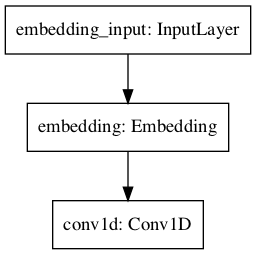

In [16]:
plot_model(model)

In [ ]:
dl_pipeline = Pipeline(stages=stageNN)

In [ ]:
# from systemml.mllearn import Keras2DML
# # epochs = 5
# # batch_size = 100
# # samples = 1000
# # max_iter = int(epochs*math.ceil(samples/batch_size))
# # sysml_model = Keras2DML(spark, model, input_shape=(1,28,28), weights='weights_dir', batch_size=batch_size, max_iter=max_iter, test_interval=0, display=10)
# # sysml_model.fit(X_train, y_train)
# from sparkdl import KerasTransformer